In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

You have recently joined a startup as a social media manager. From the reports you see, the posts on facebook are not garnering as much of a response as those on twitter or instagram. Why is it so?
You decide to study the kind of posts being made, analyse the response and see what is not working for the posts. Below is the dataset you receive from the team members.

In [2]:
fb_data=pd.read_csv('datasets/dataset_Facebook.csv',
                     sep=r'\s*;\s*', engine='python')

*The dataset discusses response on facebook for a set of posts that include different types/catogories.*

In [3]:
fb_data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [4]:
fb_data.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


You decide to do some statistical analysis and plot them on graphs to visualise the status of the responses on facebook. Graphs are anyday easier to comprehend than a long list of numbers!

Earlier, we tried to combine plots to simultaneously study relationships between pairs of variables - by exploiting the row, column and hue parameters along with lmplot and factorplot, for instance.
Here, let us try to use the exclusive FacetGrid class that comes along with Seaborn. <br>

FacetGrid is a subplot grid for plotting conditional relationships.

FacetGrid is very useful for
* Visualising distributions and relations between variables, within subsets of the concerned dataset.
* As seen before, there are three dimensions along which we observe the data - row, column and hue.

#### How do we use FacetGrid?
* We first initialise a FacetGrid object with a dataframe
* Specify the row, column and hue parameters
* Every unique value of the categorical variable is then used to create a facet along the specified axis.
* A plotting function is applied to each subset by using a map function


Let us create a FacetGrid object.

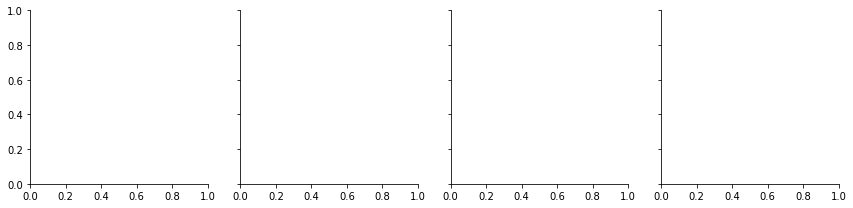

In [5]:
g=sns.FacetGrid(fb_data, col="Type")

We see that the matplotlib figure and axes are set up. We now have to map this with a plotting function, which will then be plotted on the above created structure. We will soon see that we can call different plots we have seen so far, alongwith the FacetGrid.

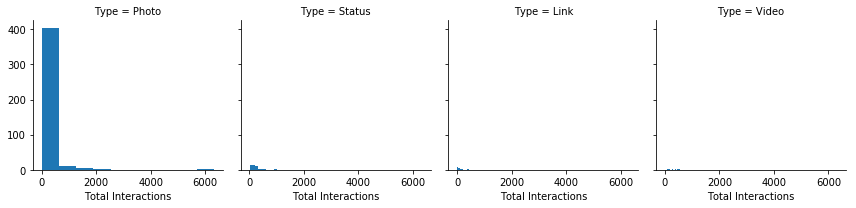

In [6]:
g=sns.FacetGrid(fb_data, col="Type")
g.map(plt.hist, "Total Interactions")

(0, 30)

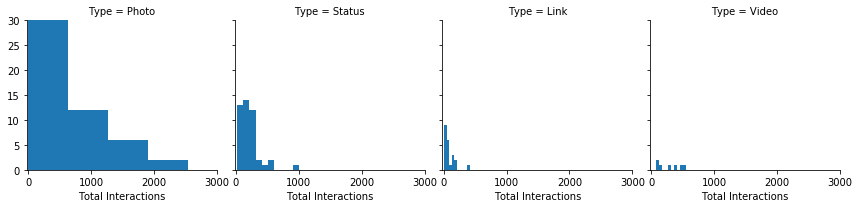

In [7]:
g=sns.FacetGrid(fb_data,col="Type")
g.map(plt.hist,"Total Interactions")

plt.xlim(-20,3000)
plt.ylim(0,30)

We have called the plt.hist function to plot a histogram for the total interactions for the different types of posts made on facebook.

It is clear that the post containing a photograph is the biggest winner. It has the maximum interaction in the form of comments, likes and shares. The histogram shows that the interaction between 0 and 500 has the largest area, implying highest number of interactions.

All posts have more interactions in the range of 50 to 500. 

The posts with a status are more popular than those with links or videos.

#### We now pass multiple variables to make a relational plot.
The scatter plot is used

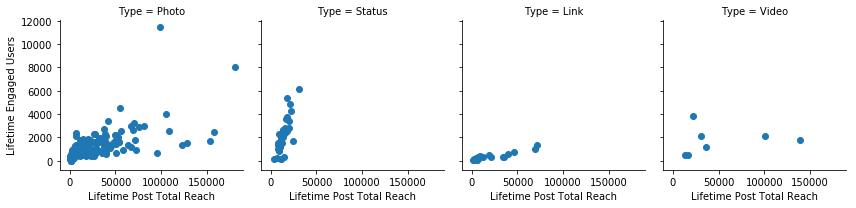

In [11]:
g=sns.FacetGrid(fb_data, col="Type")
g.map(plt.scatter,"Lifetime Post Total Reach", "Lifetime Engaged Users")

#### Adding a legend to show what the colors stand for
We have added "alpha=0.7" to reduce the opacity of the points in the scatterplot. 
It is 1 by default. Making it closer to 0 makes it more transparent.

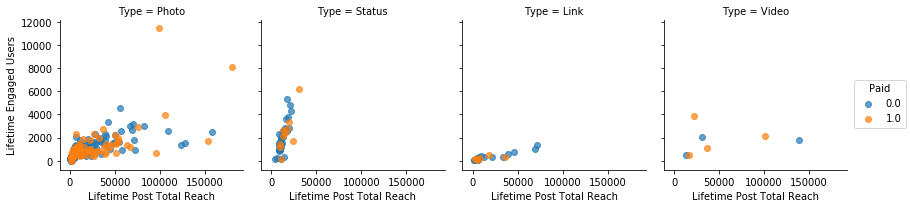

In [12]:
g=sns.FacetGrid(fb_data,col="Type",hue="Paid")

g.map(plt.scatter,"Lifetime Post Total Reach","Lifetime Engaged Users", alpha=0.7)

g.add_legend()

We can see that there are more posts that reach just less than about 50000 people. From the graph, we see that paid posts seem to be able to engage users for lifetime, while both paid and unpaid posts in this dataset seem to have the same reach.

Calling the reg plot(), 

* The margin title parameter is made true to add the title for each row
* fit_reg is made false as we do not want to plot a regression line

(0, 2500)

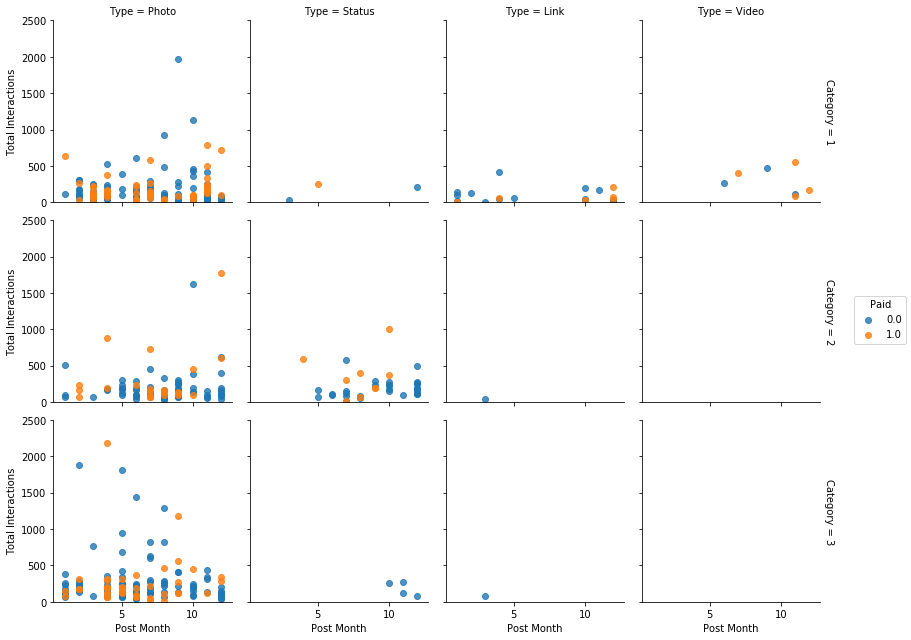

In [14]:
g=sns.FacetGrid(fb_data, row="Category", col="Type", hue="Paid", margin_titles=True)

g.map(sns.regplot,"Post Month", "Total Interactions", fit_reg=False)

g.add_legend()
plt.ylim(0,2500)

The above shows different kinds of facebook posts made throughout the year, and the total interactions received from all posts.
* The patterns show that paid posts made in the second half of the year have more interactions.
* Unpaid posts hit a high response at the start and end of the year for photos, mid year for status posts and end of the year for video posts. Links seem to have a mediocre standard response throughout the year.
* Category 1 posts have the best response for photos, while category 2 favours posts with statuses most.

### In the above plot, we have more details in the 1st plot when compared to the other two. Can we create plots such that each individual plot has a different size?
Yes, we use the gridspec parameter.

(0, 2500)

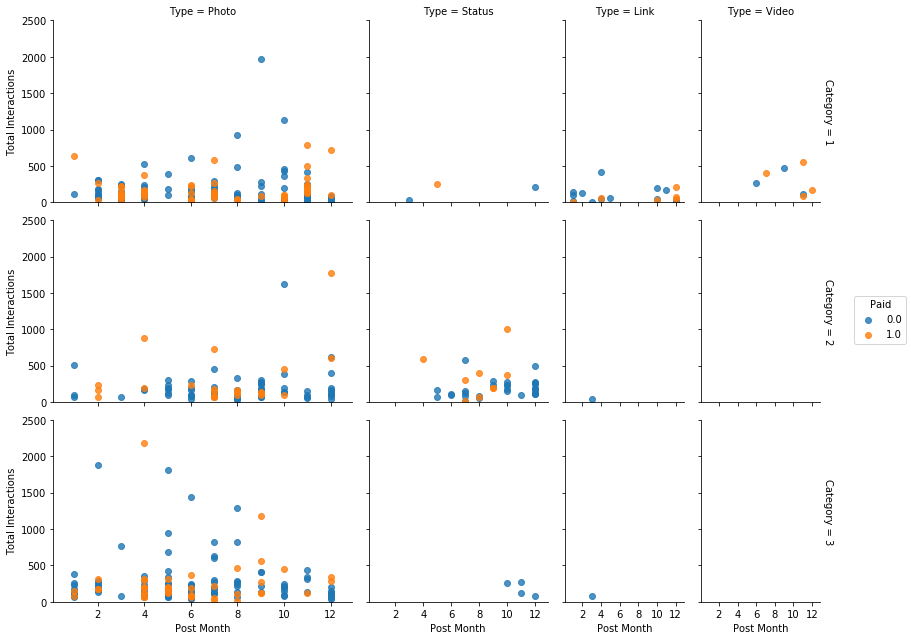

In [16]:
g=sns.FacetGrid(fb_data,row="Category", col="Type",hue="Paid", margin_titles=True,
                gridspec_kws={"width_ratios":[5, 3, 2, 2]})

g.map(sns.regplot,"Post Month","Total Interactions",fit_reg=False)

g.add_legend()
plt.ylim(0,2500)

### What if we want to specify colours that the graph has to use for each parameter?
*Create a dictionary with key as parameter and value as the color, for the hue variable*

(0, 2500)

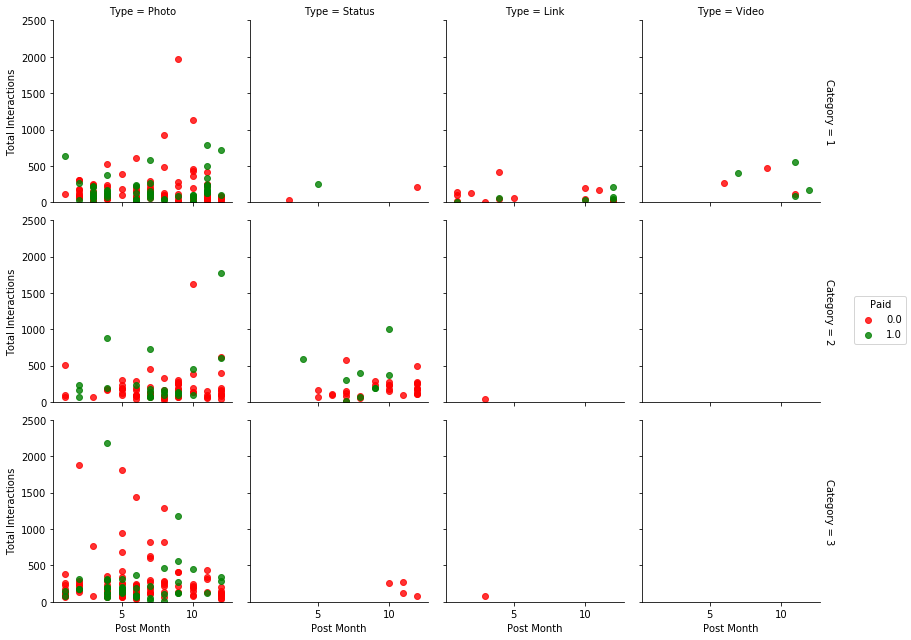

In [17]:
h={0:"red",1:"green"}
g=sns.FacetGrid(fb_data,row="Category", col="Type",hue="Paid", margin_titles=True,
                palette=h)

g.map(sns.regplot,"Post Month","Total Interactions",fit_reg=False)

g.add_legend()
plt.ylim(0,2500)

### Can we extend the same to other aspects of the hue variable?
Pass the arguments in exactly the same manner as above to hue_kw parameter

(0, 2500)

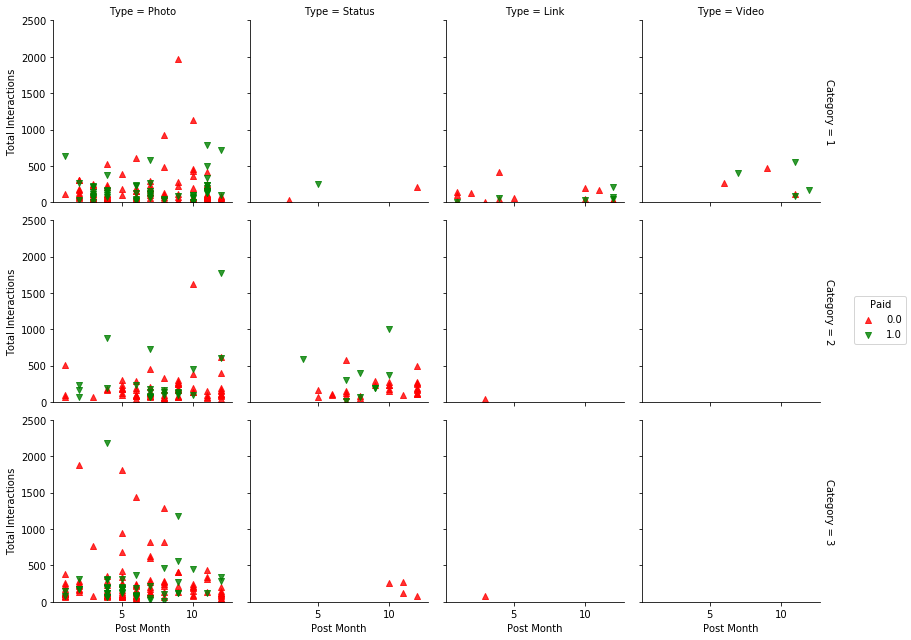

In [18]:
#Creating a dictionary for markers and passing it to hue_kws variable
h={0:"red",1:"green"}
i={"marker":["^","v"]}

g=sns.FacetGrid(fb_data,row="Category", 
                col="Type",
                hue="Paid", 
                margin_titles=True,
                palette=h,
                hue_kws=i)


g.map(sns.regplot,"Post Month","Total Interactions",fit_reg=False)

g.add_legend()
plt.ylim(0,2500)

*We see that the points are plotted with the specified markers. As we have also specified colours, we see that the markers are in accordance with the passed in color scheme*

Calling the bar plot,

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


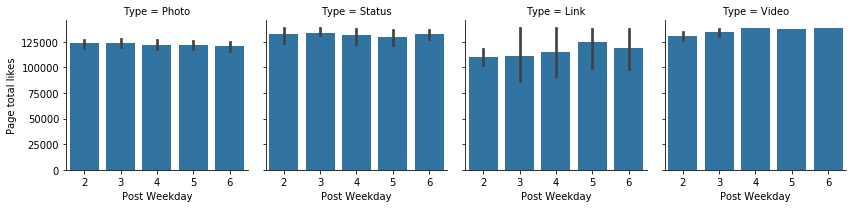

In [21]:
g=sns.FacetGrid(fb_data, col="Type")

g.map(sns.barplot, "Post Weekday", "Page total likes")

We can see that
* The number of likes received for photos are equal for every day of the week
* Likes for status posts dropped midweek
* The likes for posts with links increased slowly with every day of the week. Friday saw the most number of likes
* Likes for videos posted was almost constant throughout, slowly increasing in number as weekend emerged

### In the above plot, what if we want to print the video data first, followed by photos, status and then links?
*We simply pass in an ordered list to the corresponding parameter, for eg, row_order, hue_order, etc.* <br>
By default, the variables are ordered in ascending order if they are numbers, and in the order of appearance otherwise.

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


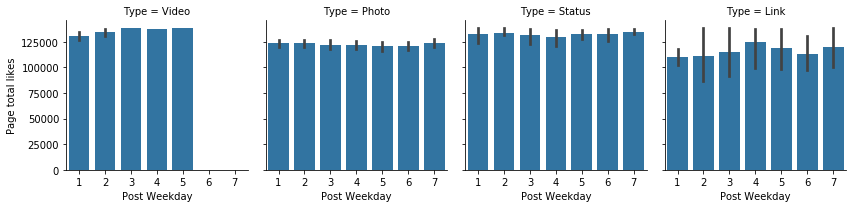

In [20]:
g=sns.FacetGrid(fb_data,col="Type", col_order=["Video", "Photo", "Status", "Link"])

g.map(sns.barplot,"Post Weekday","Page total likes")

Let us plot the same graph for every month now. We will know the how the number of likes overall varies every month.

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


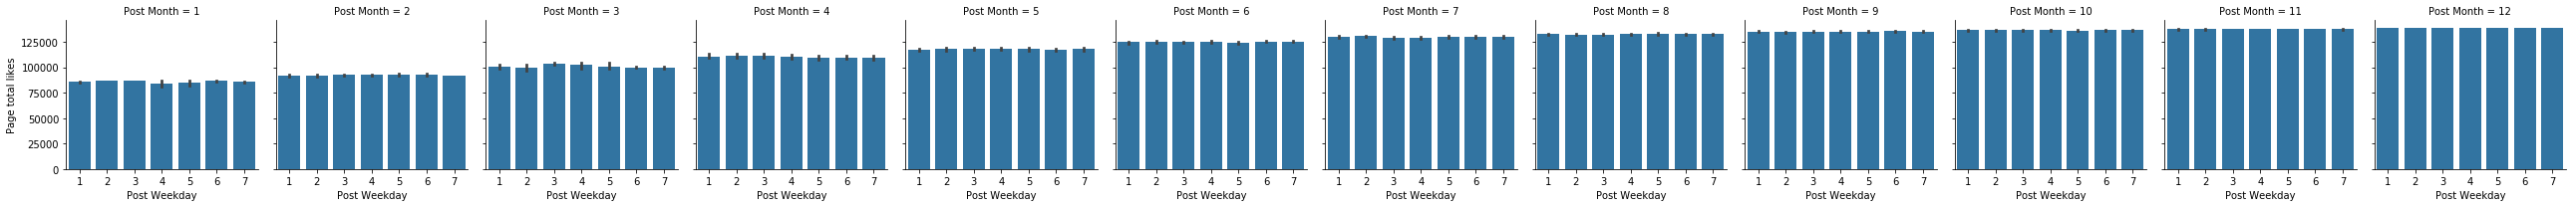

In [22]:
g=sns.FacetGrid(fb_data, col="Post Month")
g.map(sns.barplot,"Post Weekday", "Page total likes")

### We have to zoom in into each graph if we want to understand this. Do we have a way to make them of readable size and position them better?

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


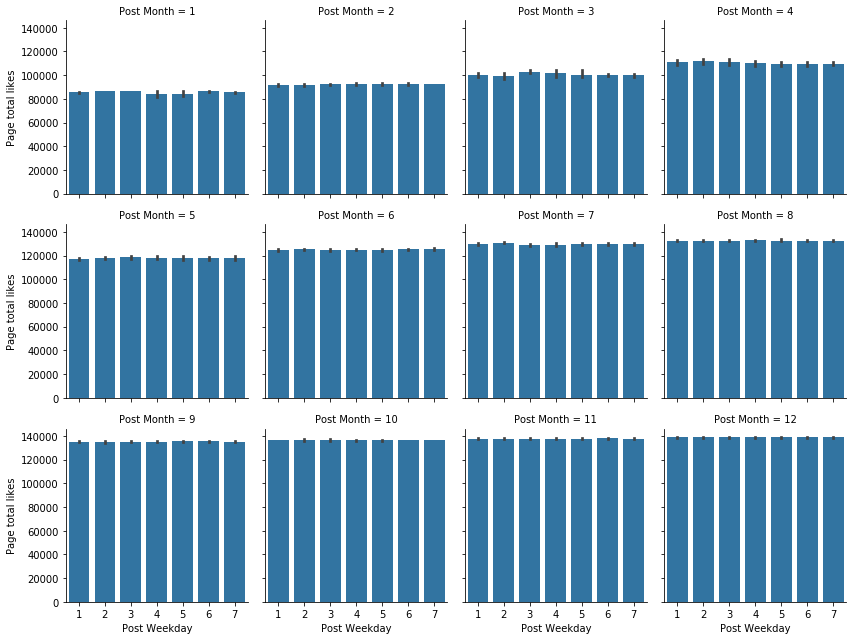

In [23]:
g=sns.FacetGrid(fb_data, col="Post Month", col_wrap=4)
g.map(sns.barplot,"Post Weekday", "Page total likes")

Posts seem to be better received in the last quarter of the year.

We have added the col_wrap parameter and set it to 4. Thus we have 4 columns in every row, and the rest of the entries are carried forward to the next rows. <br>
**Note: The same cannot be applied to the row variable**